In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import torch as t
import torch.nn as nn

from models.Autoencoder import Autoencoder
from torchvision import datasets, transforms
from scipy.stats import norm

In [2]:
bs = 4
test_ds = datasets.MNIST(root='./data/', train=False, transform=transforms.ToTensor(), download=True)
test_dl = t.utils.data.DataLoader(dataset=test_ds, batch_size=bs, shuffle=False, drop_last=True)

In [3]:
device = t.device('cuda' if t.cuda.is_available() else 'cpu')
model = Autoencoder(test_ds[0][0][None], in_c=1, enc_out_c=[32, 64, 64, 64],
                    enc_ks=[3, 3, 3, 3], enc_pads=[1, 1, 0, 1], enc_strides=[1, 2, 2, 1],
                    dec_out_c=[64, 64, 32, 1], dec_ks=[3, 3, 3, 3], dec_strides=[1, 2, 2, 1],
                    dec_pads=[1, 0, 1, 1], dec_op_pads=[0, 1, 1, 0], z_dim=2)
model.cuda(device)
model.load_state_dict(t.load('03_01.pth'))
model.eval()

Autoencoder(
  (enc_conv_layers): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.25, inplace=False)
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.25, inplace=False)
    )
    (2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2))
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.25, inplace=False)
    )
    (3): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=

In [4]:
t.set_grad_enabled(False)

In [5]:
examples = next(iter(test_dl))

In [6]:
examples[0][0].shape, examples[1][0], len(examples), len(examples[0]), len(examples[1])

(torch.Size([1, 28, 28]), tensor(7), 2, 4, 4)

In [7]:
x, y = examples[0], examples[1]
x.shape, y.shape

(torch.Size([4, 1, 28, 28]), torch.Size([4]))

In [8]:
encoder = model.enc_conv_layers
decoder = model.dec_conv_layers

In [9]:
z_points = encoder(examples[0].to(device))
reconst_imgs = decoder(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

<Figure size 1080x216 with 0 Axes>

In [10]:
for i in range(bs):
    img = x[i].squeeze()
    ax = fig.add_subplot(2, bs, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_points[i].cpu(), 1)), fontsize=10, ha='center', transform=ax.transAxes)   
    ax.imshow(img, cmap='gray_r')

for i in range(bs):
    img = reconst_imgs[i].cpu().squeeze()
    ax = fig.add_subplot(2, bs, i + bs + 1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')


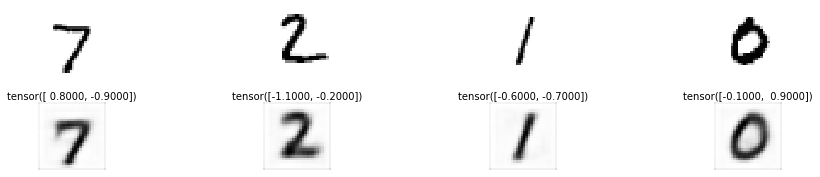

In [11]:
fig

## Mr N. Coder's wall

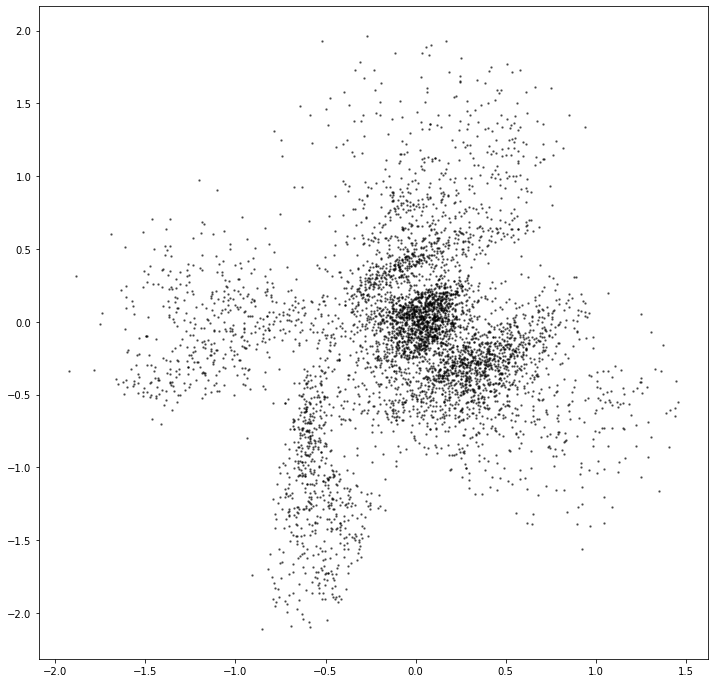

In [12]:
test_dl = t.utils.data.DataLoader(dataset=test_ds, batch_size=5000, shuffle=False, drop_last=True)
examples = next(iter(test_dl))
grid_size = 15
figsize = 12

x, y = examples[0], examples[1]
z_points = encoder(x.to(device)).cpu()

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)
plt.show()

### The new generated art exhibition

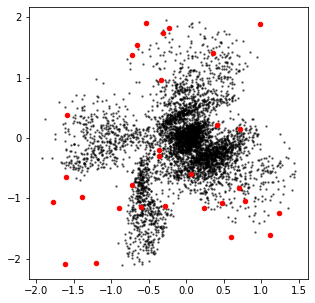

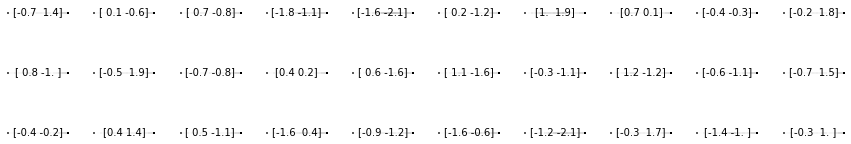

In [13]:
figsize = 5

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)

grid_size = 10
grid_depth = 3
figsize = 15

x = np.random.uniform(min_x,max_x, size = grid_size * grid_depth)
y = np.random.uniform(min_y,max_y, size = grid_size * grid_depth)
z_grid = np.array(list(zip(x, y)))
reconst = decoder(t.from_numpy(z_grid).float().to(device)).cpu()

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i],1)), fontsize=10, ha='center', transform=ax.transAxes)    
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

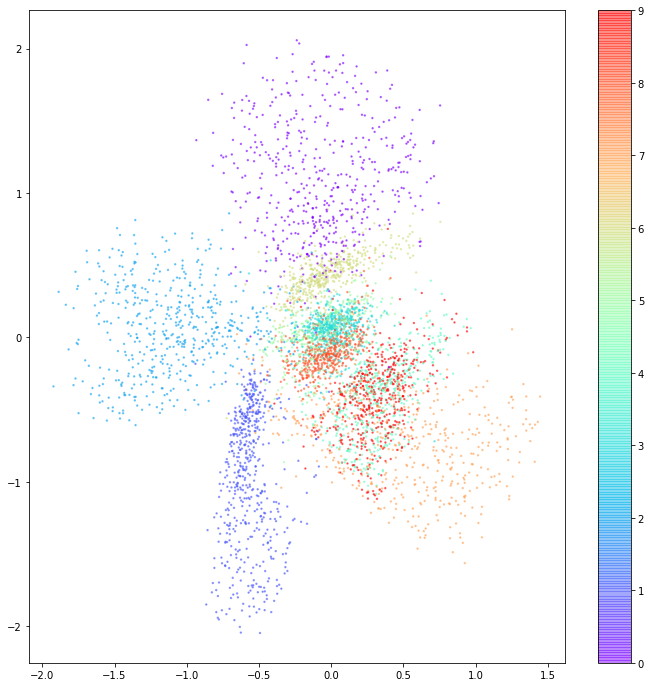

In [14]:
n_to_show = 5000
grid_size = 15
figsize = 12

test_dl = t.utils.data.DataLoader(dataset=test_ds, batch_size=n_to_show, shuffle=True, drop_last=True)
examples = next(iter(test_dl))
x, y = examples[0], examples[1]
z_points = encoder(x.to(device)).cpu()

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0], z_points[:, 1], cmap='rainbow', c= y, alpha=0.5, s=2)
plt.colorbar()
plt.show()

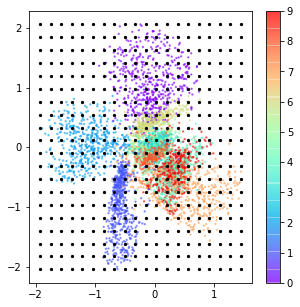

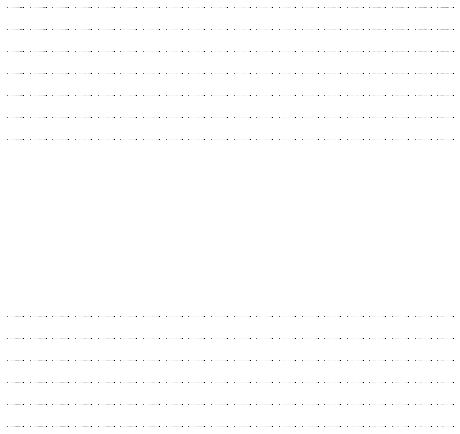

In [15]:
grid_size = 20
figsize = 8

z_points = encoder(x.to(device)).cpu()

plt.figure(figsize=(5, 5))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c=y, alpha=0.5, s=2)
plt.colorbar()

x_space = np.linspace(min(z_points[:, 0]), max(z_points[:, 0]), grid_size)
y_space = np.linspace(max(z_points[:, 1]), min(z_points[:, 1]), grid_size)
xv, yv = np.meshgrid(x_space, y_space)

xv = xv.flatten()
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv)))

reconst = decoder(t.from_numpy(z_grid).float().to(device)).cpu()

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'black', alpha=1, s=5)
plt.show()

fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size ** 2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :, :, 0], cmap = 'Greys')